# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
!pip install keras
!pip install tf

  Created wheel for tf: filename=tf-1.0.0-py3-none-any.whl size=1284 sha256=d5d1ee1ac224b03669f95d35ee5e03c017a003fb124beb8004a44d5a895a395d
  Stored in directory: /Users/ipreoteasa/Library/Caches/pip/wheels/6d/03/f6/1d97b4482b763343106cecf16b71a8b581d86fb4e0afc0865f
Successfully built tf


## Diabetes Solution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()


In [7]:
df = pd.read_csv('https://query.data.world/s/hbvdf6y2dqlpzjsc5ho5yboxy3tz7l')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.shape

(768, 9)

In [10]:
df_num= df.to_numpy()

In [66]:
X_data = df_num[:,0:-1]
Y_data= df_num[:,-1]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,test_size=.2)

In [68]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [70]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#activation='sigmoid'
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [21]:
training_history = model.fit(X_train, y_train, epochs=100, 
                             verbose=1, batch_size=32 , 
                             validation_data=(X_test, y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 222us/step - loss: 0.7482 - accuracy: 0.4723 - val_loss: 0.7158 - val_accuracy: 0.5195
Epoch 2/100
614/614 [==============================] - 0s 34us/step - loss: 0.7062 - accuracy: 0.5635 - val_loss: 0.6883 - val_accuracy: 0.6169
Epoch 3/100
614/614 [==============================] - 0s 39us/step - loss: 0.6771 - accuracy: 0.6303 - val_loss: 0.6621 - val_accuracy: 0.6429
Epoch 4/100
614/614 [==============================] - 0s 50us/step - loss: 0.6506 - accuracy: 0.6743 - val_loss: 0.6349 - val_accuracy: 0.6753
Epoch 5/100
614/614 [==============================] - 0s 47us/step - loss: 0.6239 - accuracy: 0.6987 - val_loss: 0.6095 - val_accuracy: 0.6818
Epoch 6/100
614/614 [==============================] - 0s 41us/step - loss: 0.5996 - accuracy: 0.7231 - val_loss: 0.5861 - val_accuracy: 0.6883
Epoch 7/100
614/614 [==============================] - 0s 43us/step - loss: 0.5783 - accu

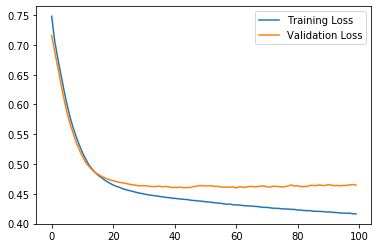

In [22]:
train_loss = training_history.history['loss']
test_loss = training_history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.legend()

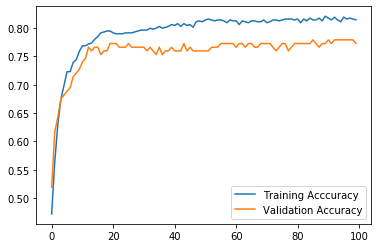

In [23]:
train_loss = training_history.history['accuracy']
test_loss = training_history.history['val_accuracy']
plt.plot(train_loss, label='Training Acccuracy')
plt.plot(test_loss, label='Validation Accuracy')
plt.legend()

In [24]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [25]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [28]:
X_train_scaled.shape

(426, 30)

## Constructing a Neural Network in Keras

In [71]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

# Importing our optimizer

from keras.optimizers import Adam, SGD

In [78]:
model = Sequential()

inputs = X_train.shape[1]
hiddens = inputs

model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1, activation='sigmoid') )

In [79]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])

In [80]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=20, batch_size=1)

Train on 614 samples, validate on 154 samples
Epoch 1/20
614/614 [==============================] - 1s 930us/step - loss: 0.1796 - accuracy: 0.7215 - val_loss: 0.1537 - val_accuracy: 0.7792
Epoch 2/20
614/614 [==============================] - 0s 651us/step - loss: 0.1592 - accuracy: 0.7622 - val_loss: 0.1589 - val_accuracy: 0.7662
Epoch 3/20
614/614 [==============================] - 0s 676us/step - loss: 0.1548 - accuracy: 0.7883 - val_loss: 0.1575 - val_accuracy: 0.7597
Epoch 4/20
614/614 [==============================] - 0s 688us/step - loss: 0.1539 - accuracy: 0.7671 - val_loss: 0.1575 - val_accuracy: 0.7727
Epoch 5/20
614/614 [==============================] - 0s 678us/step - loss: 0.1511 - accuracy: 0.7899 - val_loss: 0.1631 - val_accuracy: 0.7857
Epoch 6/20
614/614 [==============================] - 0s 683us/step - loss: 0.1516 - accuracy: 0.7785 - val_loss: 0.1628 - val_accuracy: 0.7597
Epoch 7/20
614/614 [==============================] - 0s 683us/step - loss: 0.1496 - accur

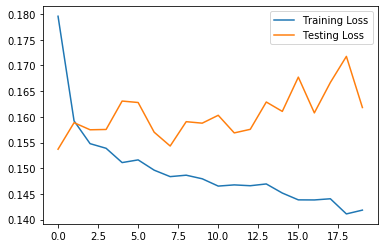

In [81]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

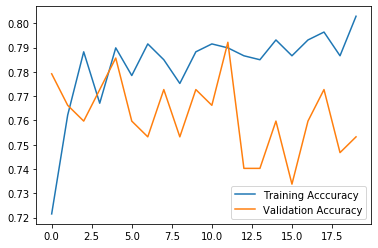

In [82]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
plt.plot(train_loss, label='Training Acccuracy')
plt.plot(test_loss, label='Validation Accuracy')
plt.legend()

In [88]:
np.hstack([model.predict(X_test), y_test.reshape(154, 1)])[:20]

array([[0.06108889, 0.        ],
       [0.24958941, 1.        ],
       [0.32289946, 1.        ],
       [0.9298287 , 1.        ],
       [0.02549329, 0.        ],
       [0.24728927, 0.        ],
       [0.00419426, 0.        ],
       [0.07218221, 0.        ],
       [0.94918203, 1.        ],
       [0.97665501, 1.        ],
       [0.35788587, 0.        ],
       [0.64378315, 1.        ],
       [0.51454538, 0.        ],
       [0.93337429, 1.        ],
       [0.00570565, 0.        ],
       [0.09007895, 0.        ],
       [0.54344225, 0.        ],
       [0.0135093 , 0.        ],
       [0.08049104, 0.        ],
       [0.23036274, 0.        ]])

In [84]:
model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 29us/step


[0.16180501858909407, 0.7532467246055603]

## Constructing a Neural Network in ("Base") Tensorflow

## You don't need this bit --> this is literally just here to show you that it would be less intuitive to do it in TF and to encourage you to stick to Keras.

In [9]:
import tensorflow as tf

In [13]:
var_1 = tf.Variable(3)
var_2 = tf.Variable(2)

var_3 = var_1 * var_2
var_4 = var_1 + var_3 * var_2

In [15]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(var_4)

In [16]:
print(result)

15


In [39]:
X_train_scaled.shape

(426, 30)

In [45]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [48]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_scaled, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.34965034965034963